#### Feature Selection 이란
- 불필요한 피처로 인해 모델 성능을 떨어뜨릴 수 있음
  - 선형모델같은 경우, 상호관계가 높은 피처가 많으면 문제 발생
     - Lightbgm, XGBoost는 피처 제거로 성능 향상시키기는 힘듬
          - 피처가 많아도 안정된 성능을 나타내기 때문
  - 설명 가능한 모델이 되도록 피처들을 선별

#### Feature Selection 하는 유형
1. 피처값의 분포 
- 레코드는 여러개, 값이 1개인 경우 변별력이 없음
2. null이 많은 경우
3. 피처간 높은 상관도
4. 결정값과의 독립성등 고려
5. 모델의 피처 중요도 기반하여 실행

#### 사이킷런 Feature Selection  지원
1. RFE
  - 피처 중요도 기반으로 가장 적은 피처부터 삭제한 후 다시 학습, 예측, 평가
  - 이 과정 반복
  - 데이터 작은 경우에만 적용됨
  - 경우의 수가 너무 많음
  - 수행시간 오래 걸림

2. SelectFromModel
  - 피처 중요도 기반으로 중앙값보다 높은 모든 피처를 선택

#### feature importance는 feature selection의 기준이 될 수 없는 이유
- 최적 트리구조를 만들기 위한 기준임
   - 결정값과 관련없어도 높을 수 있음
   - train데이터를 기반으로 생성되어 test데이터에서는 달라질 수 있음
- 모델에 대한 중요성을 나타내는 관련성과는 차이가 있음

### 1. RFE 실습

In [1]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV, RFE
from sklearn.datasets import make_classification

# 분류를 위한 Feature 개수가 25개인 데이터 1000개 생성
X, y = make_classification(n_samples=1000, n_features=25, n_informative=3,
                           n_redundant=2, n_repeated=0, n_classes=8,
                           n_clusters_per_class=1, random_state=0)

# SVC classifier 선택
svc = SVC(kernel="linear")

# REFCV로 Feature들을 반복적으로 제거해가면서 학습/평가 수행
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2), scoring='accuracy', verbose=2)# step=1 : 처음에는 25개 선택, 두번째는 24개 선택, 세번째는 23개 선텍....

rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# 피처가 3개일 때 가장 좋은 상황

Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.


<Figure size 640x480 with 1 Axes>

#### 데이터 수 조정해 다시 학습/예측/평가

In [2]:
# Build a classification task using 3 informative features
X, y = make_classification(n_samples=10000, n_features=25, n_informative=3,
                           n_redundant=2, n_repeated=0, n_classes=8,
                           n_clusters_per_class=1, random_state=0)

Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.


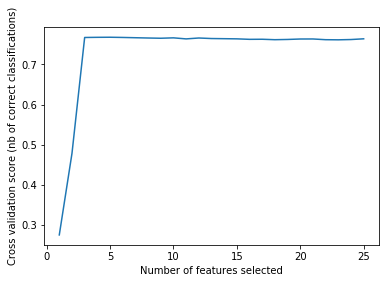

In [3]:
# SVC classifier 선택
svc = SVC(kernel="linear")

# REFCV로 Feature들을 반복적으로 제거해가면서 학습/평가 수행
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2), scoring='accuracy', verbose=2)

rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)


plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

# 5개이상의 피처에서는 비슷한 성능 보임

### 2. SelectFromModel

In [4]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


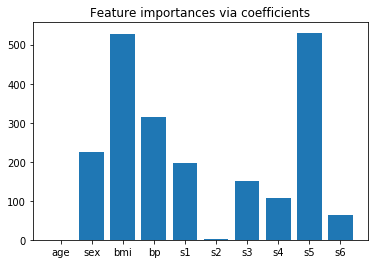

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LassoCV

# 라쏘 알고리즘 사용
lasso = LassoCV().fit(X, y)

# 회귀에서는 lasso.coef_ 회귀계수 입력
importance = np.abs(lasso.coef_)  # 절댓값으로 변환
feature_names = np.array(diabetes.feature_names)  # array로 변환

# 시각화
plt.bar(height=importance, x=feature_names)
plt.title("Feature importances via coefficients")
plt.show()

In [6]:
from sklearn.feature_selection import SelectFromModel
from time import time

threshold = np.sort(importance)[-3] + 0.01  # sort를 하면 오름차순이므로 [-3]하면 가장 높은 값 3개를 가져와 +0.01
print('threshold:', threshold)

# threshold로 기준값 설정
sfm = SelectFromModel(lasso, threshold='1.5 * median').fit(X, y)  
print("Features selected by SelectFromModel: "f"{feature_names[sfm.get_support()]}")

threshold: 314.4502601292062
Features selected by SelectFromModel: ['bmi' 'bp' 's5']


C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


### 3. Permutation(순열) importance
- 일반적인 feature selection
- 피처들의 값을 특정 값으로 변조해버림
- 사이킷런의 경우 shuffling함 -> 모델 성능이 떨어짐 -> 이 경우 해당 피처가 중요한 피처임을 알게 됨
- 피처삭제 후 재 학습/예측/평가하지 않고, val과 test데이터에 수행함
   

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

diabetes = load_diabetes()

# 데이터 분리
X_train, X_val, y_train, y_val = train_test_split(diabetes.data, diabetes.target, random_state=0)

# 학습,예측,평가
model = Ridge(alpha=1e-2).fit(X_train, y_train)
y_pred = model.predict(X_val)
print('r2 score:', r2_score(y_val, y_pred))

r2 score: 0.35666062386954545


In [ ]:
from sklearn.inspection import permutation_importance

# train데이터가 아닌 val데이터 사용
r = permutation_importance(model, X_val, y_val, n_repeats=30, random_state=0)

# 가장 평균 permutation importance가 높은 순으로 내림차순 정렬 후 평균 permutation importance값과 표준 편차 출력
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
         print(diabetes.feature_names[i],"   ", np.round(r.importances_mean[i], 4), " +/- ", np.round(r.importances_std[i], 5))

In [ ]:
r.importances_mean